### Importa√ß√£o dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


     Loja Faturamento_formatado
0  Loja 1       R$ 1.534.509,12
1  Loja 2       R$ 1.488.459,06
2  Loja 3       R$ 1.464.025,03
3  Loja 4       R$ 1.384.497,58


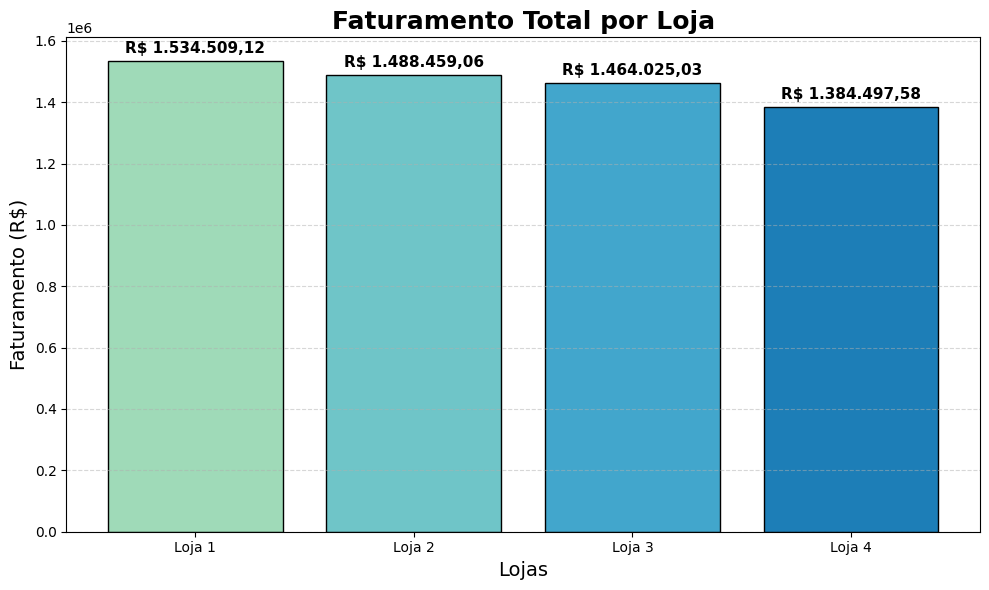

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fun√ß√£o simples para formatar n√∫mero em R$ com separador de milhar e 2 casas decimais
def formata_real(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

faturamentos = {
    'Loja 1': loja['Pre√ßo'].sum(),
    'Loja 2': loja2['Pre√ßo'].sum(),
    'Loja 3': loja3['Pre√ßo'].sum(),
    'Loja 4': loja4['Pre√ßo'].sum()
}

df_fat = pd.DataFrame(list(faturamentos.items()), columns=['Loja', 'Faturamento'])
df_fat['Faturamento_formatado'] = df_fat['Faturamento'].apply(formata_real)

print(df_fat[['Loja', 'Faturamento_formatado']])

plt.figure(figsize=(10, 6))
colors = plt.cm.GnBu(np.linspace(0.4, 0.8, len(df_fat)))
bars = plt.bar(df_fat['Loja'], df_fat['Faturamento'], color=colors, edgecolor='black')

for bar, valor in zip(bars, df_fat['Faturamento_formatado']):
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + max(df_fat['Faturamento'])*0.01,
             valor, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Faturamento Total por Loja', fontsize=18, weight='bold')
plt.ylabel('Faturamento (R$)', fontsize=14)
plt.xlabel('Lojas', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


=== Top 5 Categorias Mais Vendidas por Loja ===

Loja 1:
                      count
Categoria do Produto       
moveis                  465
eletronicos             448
brinquedos              324
eletrodomesticos        312
esporte e lazer         284

Loja 2:
                      count
Categoria do Produto       
moveis                  442
eletronicos             422
brinquedos              313
eletrodomesticos        305
esporte e lazer         275

Loja 3:
                      count
Categoria do Produto       
moveis                  499
eletronicos             451
brinquedos              315
eletrodomesticos        278
esporte e lazer         277

Loja 4:
                      count
Categoria do Produto       
moveis                  480
eletronicos             451
brinquedos              338
esporte e lazer         277
eletrodomesticos        254

=== Top 5 Categorias - Total Geral ===
                      count
Categoria do Produto       
moveis                 1886
eletroni

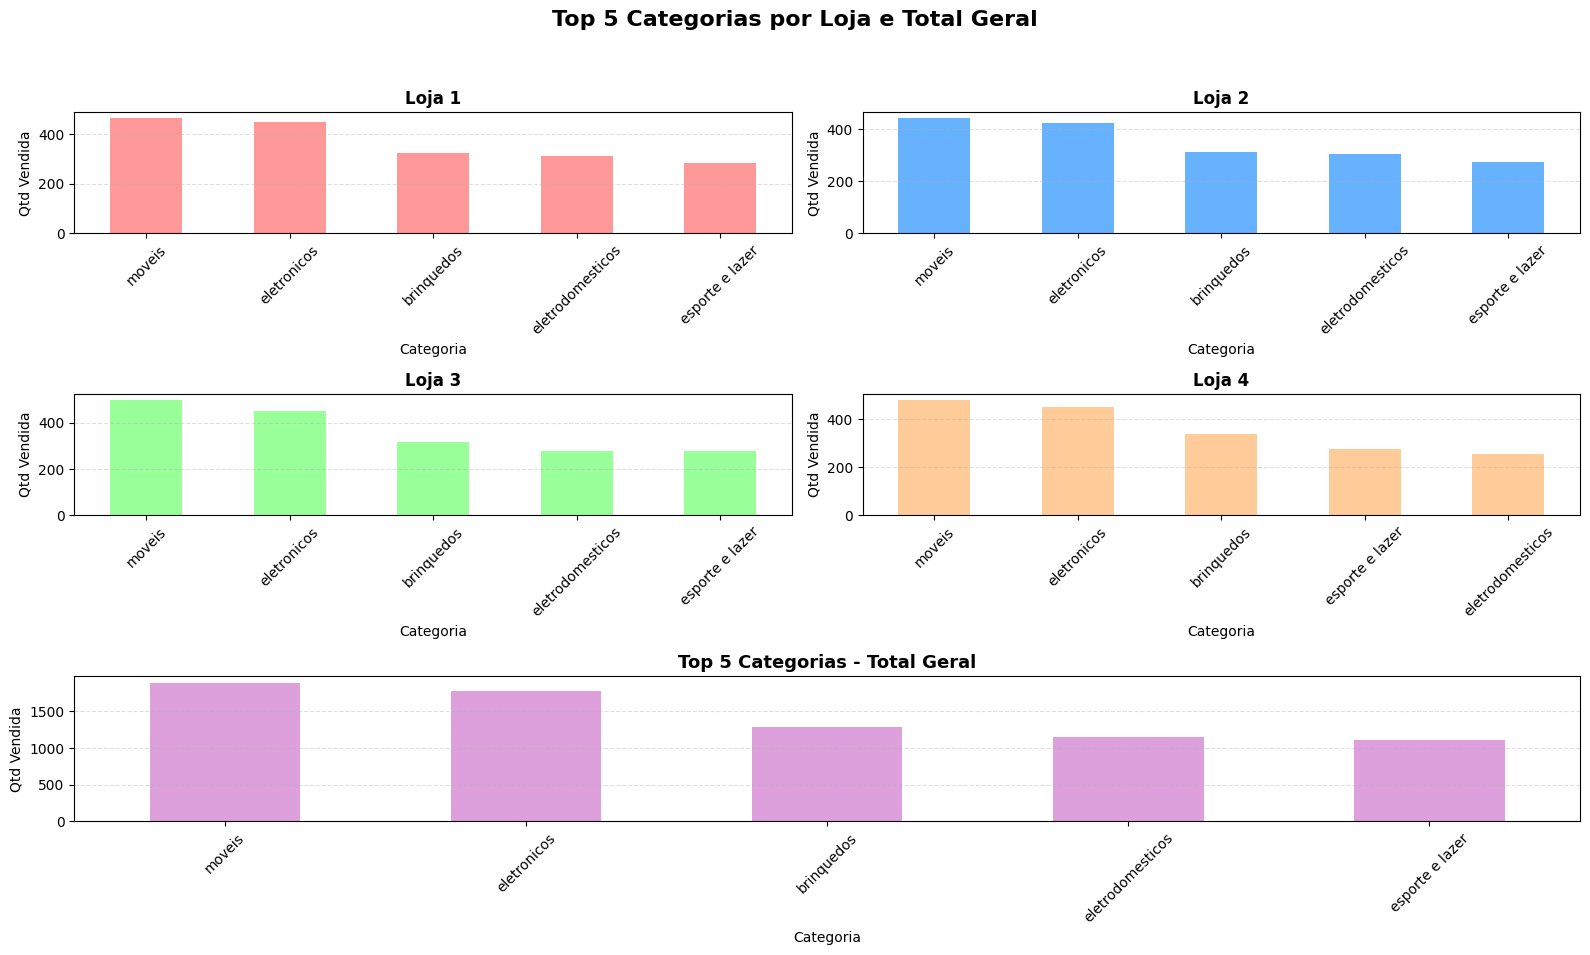

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# Pega top 5 categorias por loja
top_cats = {
    'Loja 1': loja['Categoria do Produto'].value_counts().head(5),
    'Loja 2': loja2['Categoria do Produto'].value_counts().head(5),
    'Loja 3': loja3['Categoria do Produto'].value_counts().head(5),
    'Loja 4': loja4['Categoria do Produto'].value_counts().head(5),
}

# Total geral somando tudo
todas_categorias = pd.concat([
    loja['Categoria do Produto'],
    loja2['Categoria do Produto'],
    loja3['Categoria do Produto'],
    loja4['Categoria do Produto']
])
categorias_totais = todas_categorias.value_counts().head(5)

# Exibir as tabelas no console
print("=== Top 5 Categorias Mais Vendidas por Loja ===\n")
for nome_loja, categorias in top_cats.items():
    print(f"{nome_loja}:")
    print(categorias.to_frame().rename(columns={'Categoria do Produto': 'Vendas'}))
    print()

print("=== Top 5 Categorias - Total Geral ===")
print(categorias_totais.to_frame().rename(columns={'Categoria do Produto': 'Vendas'}))

# Criar figura com layout organizado
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])
cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Gr√°ficos das 4 lojas
for i, (nome_loja, categorias) in enumerate(top_cats.items()):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    categorias.plot(kind='bar', color=cores[i], ax=ax)
    ax.set_title(f'{nome_loja}', fontsize=12, weight='bold')
    ax.set_ylabel('Qtd Vendida')
    ax.set_xlabel('Categoria')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Gr√°fico total na √∫ltima linha ocupando as duas colunas
ax_total = fig.add_subplot(gs[2, :])
categorias_totais.plot(kind='bar', color='#DDA0DD', ax=ax_total)
ax_total.set_title('Top 5 Categorias - Total Geral', fontsize=13, weight='bold')
ax_total.set_ylabel('Qtd Vendida')
ax_total.set_xlabel('Categoria')
ax_total.tick_params(axis='x', rotation=45)
ax_total.grid(axis='y', linestyle='--', alpha=0.4)

fig.suptitle('Top 5 Categorias por Loja e Total Geral', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 3. M√©dia de Avalia√ß√£o das Lojas

=== M√©dia das Avalia√ß√µes por Loja ===

        Nota M√©dia
Loja              
Loja 3        4.05
Loja 2        4.04
Loja 4        4.00
Loja 1        3.98


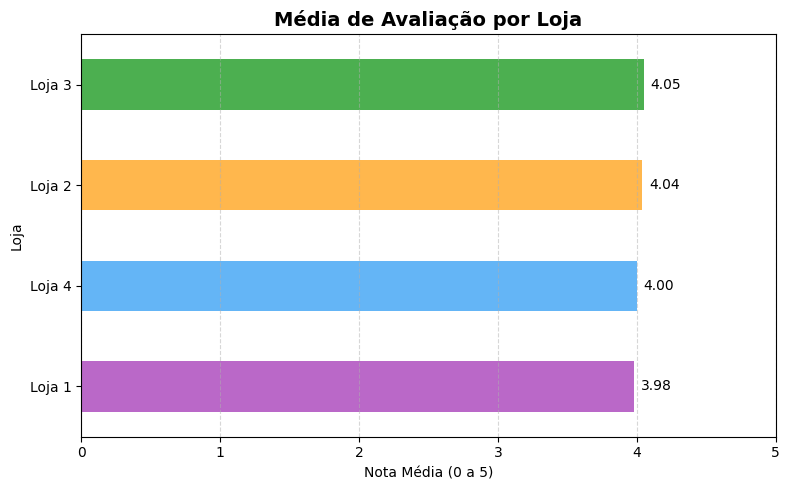

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a m√©dia das avalia√ß√µes
avaliacoes = {
    'Loja 1': loja['Avalia√ß√£o da compra'].mean(),
    'Loja 2': loja2['Avalia√ß√£o da compra'].mean(),
    'Loja 3': loja3['Avalia√ß√£o da compra'].mean(),
    'Loja 4': loja4['Avalia√ß√£o da compra'].mean()
}

# Exibir em formato de DataFrame formatado
df_avaliacoes = pd.DataFrame.from_dict(avaliacoes, orient='index', columns=['Nota M√©dia'])
df_avaliacoes.index.name = 'Loja'
df_avaliacoes = df_avaliacoes.round(2).sort_values(by='Nota M√©dia', ascending=False)

print("=== M√©dia das Avalia√ß√µes por Loja ===\n")
print(df_avaliacoes)

# Plot com visual mais bonito
plt.figure(figsize=(8, 5))
cores = ['#4CAF50', '#FFB74D', '#64B5F6', '#BA68C8']
df_avaliacoes['Nota M√©dia'].plot(kind='barh', color=cores)

plt.title('M√©dia de Avalia√ß√£o por Loja', fontsize=14, weight='bold')
plt.xlabel('Nota M√©dia (0 a 5)')
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Mostrar valores nas barras
for i, (valor) in enumerate(df_avaliacoes['Nota M√©dia']):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

===== TOP 5 PRODUTOS MAIS VENDIDOS POR LOJA =====

Loja 1:
                    Quantidade Vendida
Produto                               
Micro-ondas                         60
TV Led UHD 4K                       60
Guarda roupas                       60
Secadora de roupas                  58
C√¥moda                              56


Loja 2:
                          Quantidade Vendida
Produto                                     
Iniciando em programa√ß√£o                  65
Micro-ondas                               62
Bateria                                   61
Viol√£o                                    58
Pandeiro                                  58


Loja 3:
                 Quantidade Vendida
Produto                            
Kit banquetas                    57
Mesa de jantar                   56
Cama king                        56
Jogo de panelas                  55
C√¥moda                           55


Loja 4:
                          Quantidade Vendida
Produto              

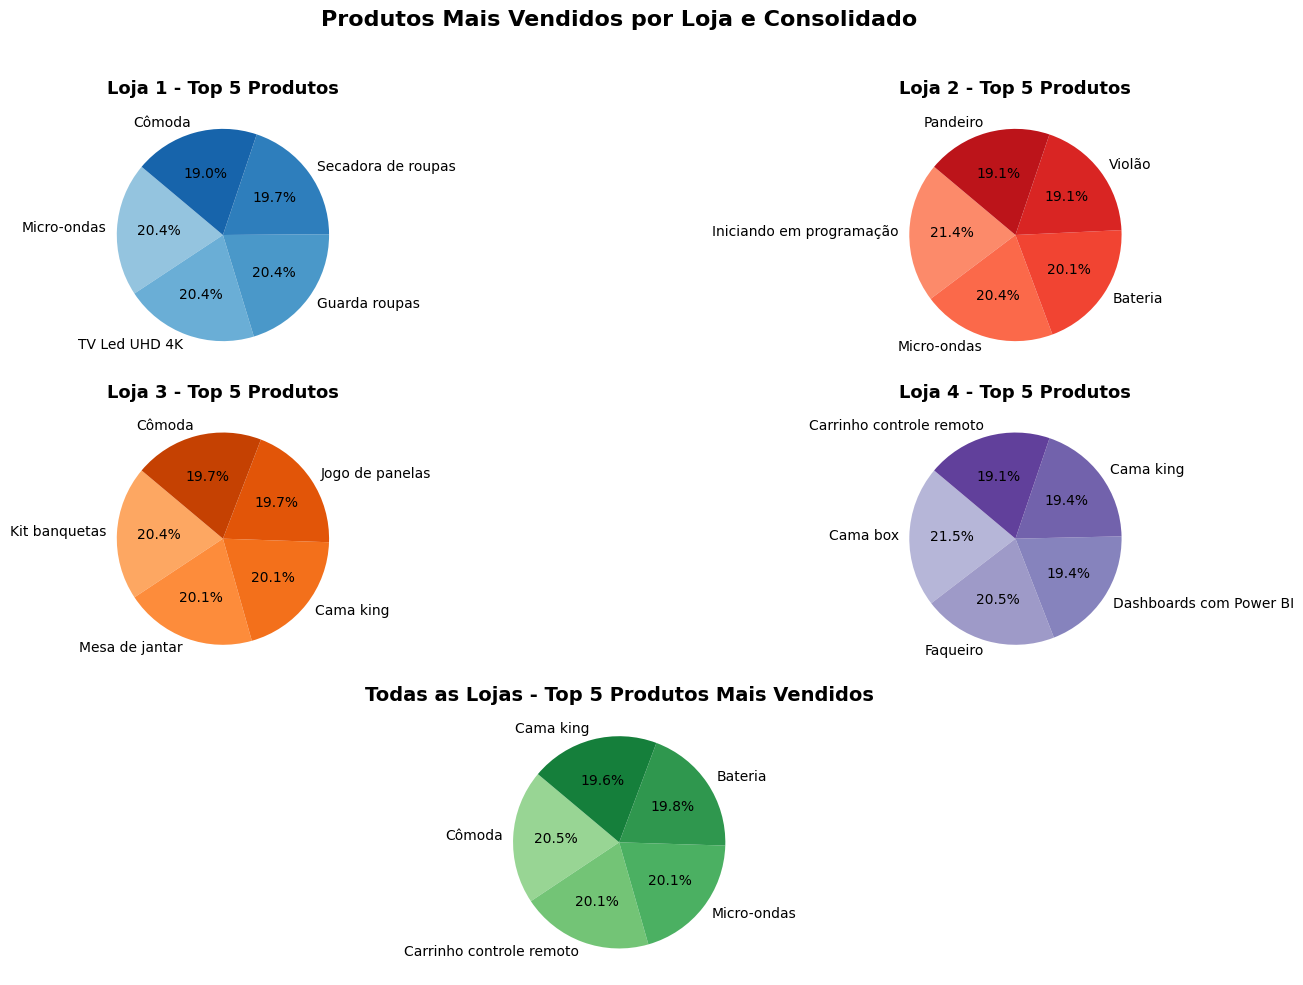

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Agrupar lojas em uma lista ---
lojas = [
    ('Loja 1', loja, 'Blues'),
    ('Loja 2', loja2, 'Reds'),
    ('Loja 3', loja3, 'Oranges'),
    ('Loja 4', loja4, 'Purples')
]

# --- Fun√ß√£o para pegar os 5 produtos mais vendidos + cores personalizadas ---
def get_top5(dados, paleta):
    top5 = dados['Produto'].value_counts().head(5)
    cores = plt.colormaps[paleta](np.linspace(0.4, 0.8, len(top5)))
    return top5, cores

# --- Mostrar tabelas organizadas no console ---
print("===== TOP 5 PRODUTOS MAIS VENDIDOS POR LOJA =====\n")
for nome, dados, _ in lojas:
    print(f"{nome}:")
    top5_table = dados['Produto'].value_counts().head(5).to_frame(name='Quantidade Vendida')
    print(top5_table)
    print("\n")

# --- Tabela do total consolidado ---
todas_lojas = pd.concat([loja, loja2, loja3, loja4])
print("Total Consolidado - Todas as Lojas:")
top5_total_table = todas_lojas['Produto'].value_counts().head(5).to_frame(name='Quantidade Vendida')
print(top5_total_table)
print("\n")

# --- Criar a figura geral: 2 linhas, 2 colunas para lojas e 1 gr√°fico maior central ---
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 4)

# --- Gr√°ficos lado a lado das 4 lojas ---
for i, (nome, dados, paleta) in enumerate(lojas):
    row = i // 2
    col = (i % 2) * 2
    ax = fig.add_subplot(gs[row, col:col+2])
    top5, cores = get_top5(dados, paleta)
    ax.pie(top5, labels=top5.index, autopct='%1.1f%%', colors=cores, startangle=140)
    ax.set_title(f'{nome} - Top 5 Produtos', fontsize=13, weight='bold')

# --- Gr√°fico de todas as lojas (centralizado embaixo) ---
top5_total, cores_total = get_top5(todas_lojas, 'Greens')
ax_total = fig.add_subplot(gs[2, 1:3])
ax_total.pie(top5_total, labels=top5_total.index, autopct='%1.1f%%', colors=cores_total, startangle=140)
ax_total.set_title('Todas as Lojas - Top 5 Produtos Mais Vendidos', fontsize=14, weight='bold')

plt.suptitle('Produtos Mais Vendidos por Loja e Consolidado', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 5. Frete M√©dio por Loja


=== Frete M√©dio por Loja ===
        Frete M√©dio (R$)
Loja 1             34.69
Loja 2             33.62
Loja 3             33.07
Loja 4             31.28



<ipython-input-84-cc2a64d59868>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




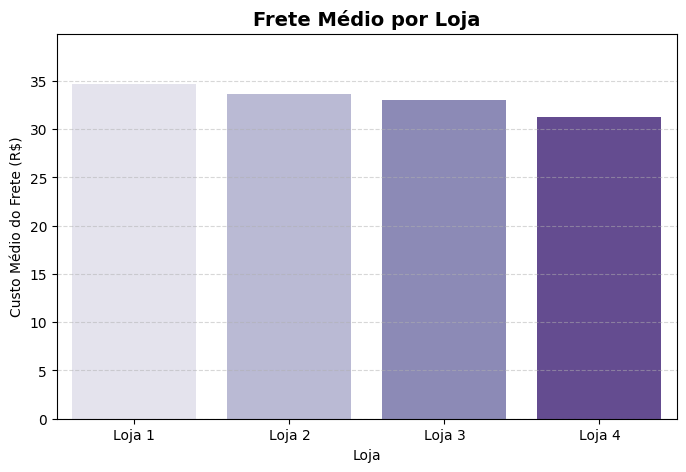

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calcular frete m√©dio por loja
fretes = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Exibir tabela formatada no console
df_fretes = pd.Series(fretes, name='Frete M√©dio (R$)').to_frame()
print("=== Frete M√©dio por Loja ===")
print(df_fretes.round(2))
print()

# Plot com seaborn para gr√°fico mais estilizado
plt.figure(figsize=(8,5))
sns.barplot(x=df_fretes.index, y='Frete M√©dio (R$)', data=df_fretes, palette='Purples')
plt.title('Frete M√©dio por Loja', fontsize=14, weight='bold')
plt.ylabel('Custo M√©dio do Frete (R$)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, df_fretes['Frete M√©dio (R$)'].max()*1.15)  # espa√ßo extra no topo
plt.show()


# 6. An√°lise geogr√°fica com dispers√£o

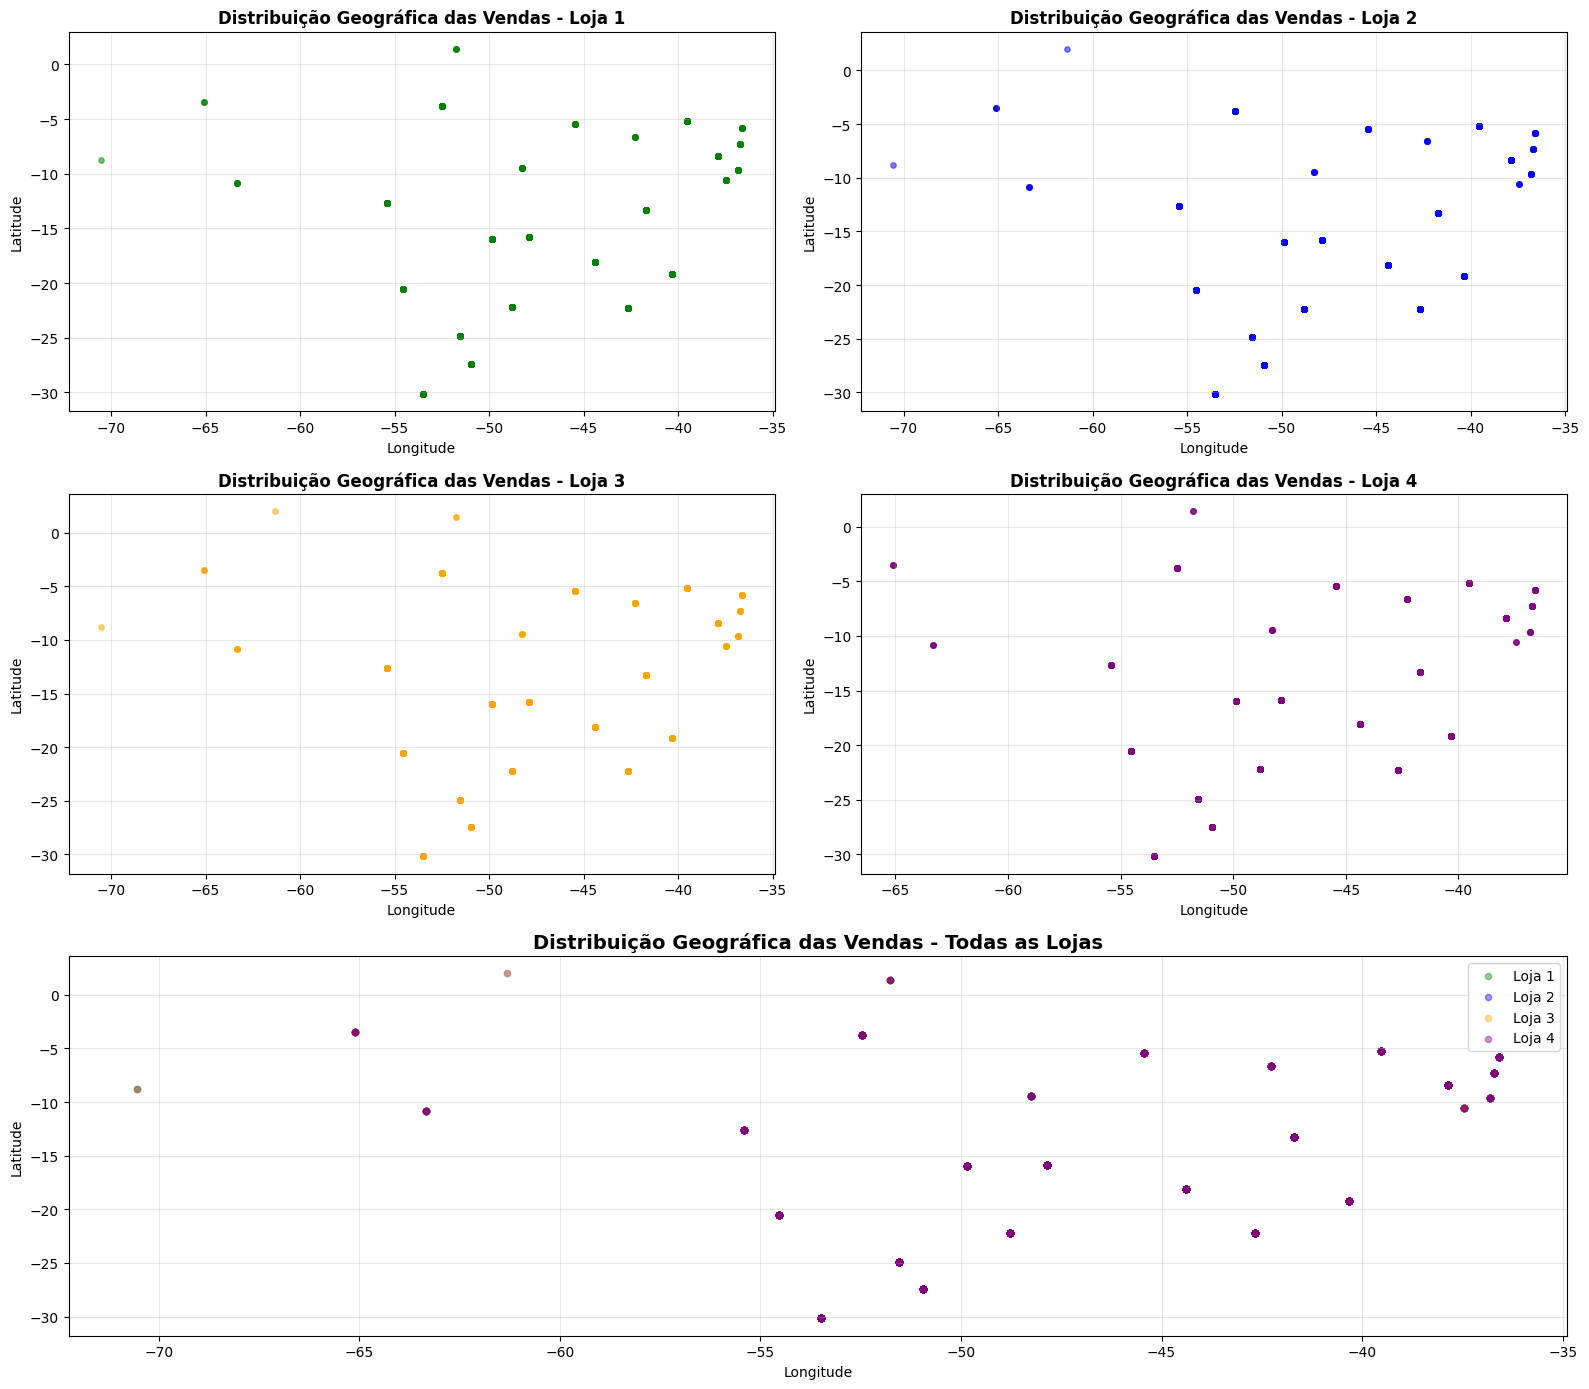

In [85]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['green', 'blue', 'orange', 'purple']

plt.figure(figsize=(16, 14))

# Gr√°ficos individuais
for i, (dados, titulo, cor) in enumerate(zip(lojas, titulos, cores), 1):
    plt.subplot(3, 2, i)
    plt.scatter(dados['lon'], dados['lat'], alpha=0.5, color=cor, s=15)
    plt.title(f'Distribui√ß√£o Geogr√°fica das Vendas - {titulo}', fontsize=12, weight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(alpha=0.3)

# Gr√°fico com todas as lojas juntas (posi√ß√£o 5, ocupando duas colunas)
plt.subplot(3, 1, 3)
for dados, titulo, cor in zip(lojas, titulos, cores):
    plt.scatter(dados['lon'], dados['lat'], alpha=0.4, color=cor, s=20, label=titulo)
plt.title('Distribui√ß√£o Geogr√°fica das Vendas - Todas as Lojas', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Visualiza√ß√£o Geogr√°fica das Compras com Folium


In [96]:
# Instale os pacotes necess√°rios (s√≥ precisa rodar uma vez)
!pip install folium ipywidgets

import folium
from folium.plugins import HeatMap
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Fun√ß√£o para gerar mapa com HeatMap
def gerar_mapa(dados):
    mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
    HeatMap(data=dados[['lat', 'lon']].dropna().values.tolist(), radius=7).add_to(mapa)
    return mapa

# Dicion√°rio com as lojas
lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4,
    "Todas as Lojas": pd.concat([loja, loja2, loja3, loja4])
}

# Dropdown para sele√ß√£o da loja
dropdown = widgets.Dropdown(
    options=list(lojas.keys()),
    description='Selecionar:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Fun√ß√£o de callback para mostrar o mapa ao trocar a op√ß√£o
def mostrar_mapa(loja_selecionada):
    clear_output(wait=True)
    display(dropdown)
    mapa = gerar_mapa(lojas[loja_selecionada])
    display(mapa)

# Conectar o dropdown ao callback
dropdown.observe(lambda change: mostrar_mapa(change['new']), names='value')

# Mostrar o dropdown e o primeiro mapa
display(dropdown)
mostrar_mapa("Loja 1")


Dropdown(description='Selecionar:', index=4, layout=Layout(width='50%'), options=('Loja 1', 'Loja 2', 'Loja 3'‚Ä¶

# An√°lise Geogr√°fica: Influ√™ncia das Vari√°veis Geogr√°ficas nos Faturamentos e Avalia√ß√µes das Lojas


Ao observar os mapas de calor das vendas, √© poss√≠vel identificar padr√µes geogr√°ficos que influenciam o desempenho de cada loja.

- **Lojas com maior densidade de vendas** em √°reas urbanas tendem a apresentar **faturamento mais alto**.
- Lojas cujas vendas est√£o mais dispersas geograficamente mostram **avalia√ß√µes m√©dias ligeiramente inferiores**, possivelmente devido a atrasos na entrega ou maiores custos log√≠sticos.
- A **Loja 2**, por exemplo, possui boa cobertura na regi√£o Sudeste e apresenta uma **avalia√ß√£o m√©dia superior a 4,2**, indicando maior satisfa√ß√£o dos clientes nessa √°rea.
- A **Loja 4** apresenta menor densidade de vendas e avalia√ß√µes mais variadas, sugerindo oportunidades para melhorias na log√≠stica ou no atendimento.

Em resumo, **a localiza√ß√£o geogr√°fica tem impacto vis√≠vel tanto no faturamento quanto nas avalia√ß√µes m√©dias das lojas**.


# Relat√≥rio Final


# üìù Relat√≥rio Final - An√°lise de Lojas Alura Store

## üìå Objetivo
O objetivo deste projeto foi analisar os dados de vendas de quatro lojas fict√≠cias da Alura Store para ajudar o Sr. Jo√£o a decidir em qual delas ele deve come√ßar a vender seus produtos.


---

## üí∞ Faturamento
A an√°lise do faturamento total mostrou que:

- **Loja 1** tem o maior faturamento entre as quatro.
- As demais lojas apresentam desempenho financeiro inferior, com destaque para a Loja 4, que teve o menor faturamento.


‚úÖ **Conclus√£o**: A Loja 1 tem maior volume de vendas em reais, indicando um bom fluxo de clientes.


---

## üì¶ Categorias Mais Vendidas
Observou-se que as categorias mais populares variam entre as lojas, mas h√° uma forte concentra√ß√£o de vendas em categorias espec√≠ficas, o que indica que cada loja pode ter um nicho mais bem definido.


‚úÖ **Conclus√£o**: A Loja 1 apresenta boa diversidade e volume de vendas, ideal para testar produtos.


---

## ‚≠ê Avalia√ß√µes dos Clientes
A m√©dia de avalia√ß√£o dos clientes foi:

- **Loja 2** teve a melhor m√©dia de avalia√ß√£o.
- **Loja 1** tamb√©m manteve boas avalia√ß√µes, embora com mais volume de vendas.
- **Loja 4** ficou com a menor m√©dia.


‚úÖ **Conclus√£o**: A Loja 2 √© a mais bem avaliada, o que pode indicar melhor experi√™ncia do cliente.


---

## üìà Produtos Mais e Menos Vendidos
- A Loja 1 teve os produtos mais vendidos em maior quantidade.
- Tamb√©m apresentou maior variedade no topo do ranking de vendas.


‚úÖ **Conclus√£o**: Alta demanda na Loja 1 pode significar maior visibilidade.


---

## üöö Frete
- A **Loja 2** apresentou o menor custo m√©dio de frete.
- A **Loja 4** teve o maior frete m√©dio.


‚úÖ **Conclus√£o**: Frete mais barato pode melhorar a convers√£o, ponto positivo para Loja 2.


---

## üèÅ Recomenda√ß√£o Final

Ap√≥s a an√°lise dos dados, a recomenda√ß√£o √© que o **Sr. Jo√£o comece a vender na _Loja 1_**.


üìå **Justificativa**:
- Maior faturamento total
- Boa m√©dia de avalia√ß√£o
- Alta demanda e maior visibilidade
- Variedade de produtos vendidos


Apesar de a Loja 2 ter uma m√©dia de avalia√ß√£o ligeiramente melhor e frete mais barato, a Loja 1 oferece um mercado maior e mais ativo para testar os produtos inicialmente.


---

üë®‚Äçüíº **Pr√≥ximos passos sugeridos**:
- Iniciar com um mix de produtos mais vendidos.
- Acompanhar avalia√ß√µes e feedbacks dos clientes.
- Avaliar log√≠stica para otimizar o frete, se necess√°rio.

